In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data_dir = 'data/'
rnaseq_file = data_dir + 'lihc_rnaseq.csv.gz'

rnaseq = (pd.
          read_csv(rnaseq_file,compression="gzip").
          set_index('bcr_patient_barcode').
          applymap(lambda x : int(np.ceil(x)))
         )
display(rnaseq.shape)
display(rnaseq.head())

(423, 20531)

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,0,2,4,91,1018,0,142,1,0,0,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,0,27,3,72,640,0,123,2,0,0,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,0,0,5,96,743,0,96,2,1,0,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,0,6,6,62,1187,0,281,1,0,0,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,0,12,6,105,879,0,283,0,0,0,...,42,1000,1632,5,1381,2903,576,666,3,120


In [3]:
gene_name_logical = [len(x[0])>1 for x in rnaseq.columns.str.split('|')]
sub = rnaseq.loc[:,gene_name_logical]
sub.columns = [x[0] for x in sub.columns.str.split('|')]
rnaseq_sub = sub.copy()
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


In [4]:
rnaseq_sub.index = rnaseq_sub.index.map(lambda x: '-'.join(x.split('-')[:3]).lower())
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
tcga-2y-a9gs,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
tcga-2y-a9gt,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
tcga-2y-a9gu,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
tcga-2y-a9gv,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


<Figure size 1000x800 with 0 Axes>

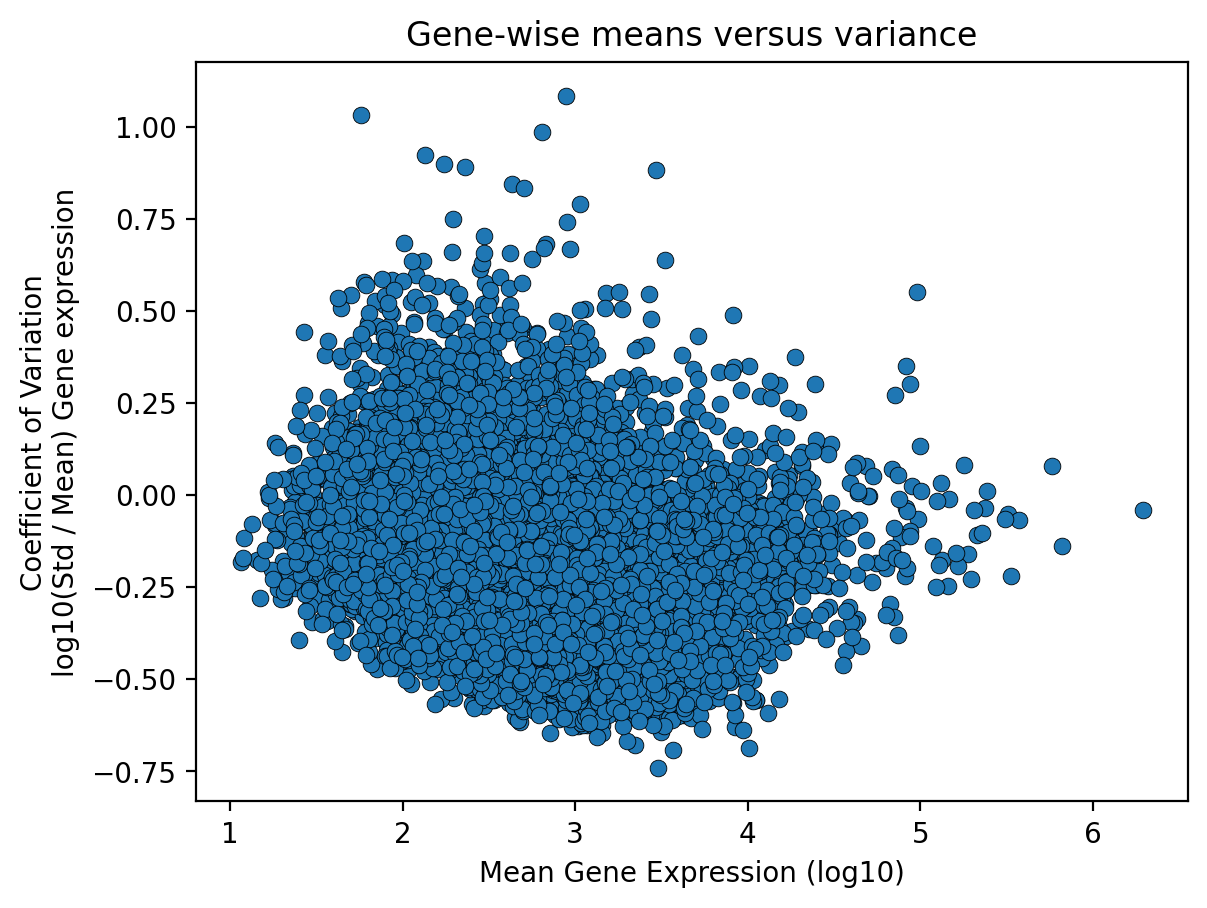

In [5]:
exprs_genes = rnaseq_sub[rnaseq_sub>0].dropna(axis=1)
mean_vec = exprs_genes.mean()
sd_vec = exprs_genes.std()
cv_vec = sd_vec / mean_vec
fig = plt.figure(figsize=(10,8))
plt.figure(dpi=200)
plt.scatter(np.log10(mean_vec), np.log10(cv_vec),edgecolor='black',linewidth=.3)
plt.title('Gene-wise means versus variance')
plt.xlabel('Mean Gene Expression (log10)')
plt.ylabel('Coefficient of Variation\nlog10(Std / Mean) Gene expression');

In [6]:
clinical_file = data_dir + 'clinical.tsv'
clinical = pd.read_csv(clinical_file, sep='\t')
clinical['submitter_id'] = clinical['submitter_id'].map(lambda x: x.lower())
clinical.head()

,case_id,submitter_id,project_id,gender,year_of_birth,race,days_to_birth,ethnicity,vital_status,days_to_death,...,treatment_effect,initial_disease_status,treatment_type,therapeutic_agents,regimen_or_line_of_therapy,treatment_intent_type,treatment_anatomic_site,treatment_outcome,days_to_treatment_end,treatment_or_therapy
0,bce25281-502e-4599-9679-32dc8462ffb1,tcga-dd-a4ne,TCGA-LIHC,female,1936,white,-27549,hispanic or latino,Dead,660,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
1,654af137-70d9-4ee4-9f69-793e352d30f8,tcga-dd-a1ee,TCGA-LIHC,male,1933,white,-26858,not hispanic or latino,Dead,349,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
2,45f00f00-d793-4dca-aeb9-7626d4575c90,tcga-gj-a9db,TCGA-LIHC,male,1945,white,-25020,not hispanic or latino,Dead,67,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
3,496beef9-80d9-4734-a23d-334ae1b6aaab,tcga-dd-aac8,TCGA-LIHC,male,1936,asian,-26322,not hispanic or latino,Dead,16,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
4,d1aa9c1a-d732-48c0-b669-8a14e0397344,tcga-2y-a9gv,TCGA-LIHC,female,1953,white,-20011,not hispanic or latino,Dead,2532,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,yes


In [17]:
descr_dict = pickle.load(open(data_dir + 'hallmarks_of_cancer_description_dictionary.pkl','rb'))
geneset_dict = pickle.load(open(data_dir + 'hallmarks_of_cancer_geneset_dictionary.pkl','rb'))
print(geneset_dict)

{'HALLMARK_ADIPOGENESIS': array(['ABCA1', 'ABCB8', 'ACAA2', 'ACADL', 'ACADM', 'ACADS', 'ACLY',
       'ACO2', 'ACOX1', 'ADCY6', 'ADIG', 'ADIPOQ', 'ADIPOR2', 'AGPAT3',
       'AIFM1', 'AK2', 'ALDH2', 'ALDOA', 'ANGPT1', 'ANGPTL4', 'APLP2',
       'APOE', 'ARAF', 'ARL4A', 'ATL2', 'ATP1B3', 'ATP5PO', 'BAZ2A',
       'BCKDHA', 'BCL2L13', 'BCL6', 'C3', 'CAT', 'CAVIN1', 'CAVIN2',
       'CCNG2', 'CD151', 'CD302', 'CD36', 'CDKN2C', 'CHCHD10', 'CHUK',
       'CIDEA', 'CMBL', 'CMPK1', 'COL15A1', 'COL4A1', 'COQ3', 'COQ5',
       'COQ9', 'COX6A1', 'COX7B', 'COX8A', 'CPT2', 'CRAT', 'CS', 'CYC1',
       'CYP4B1', 'DBT', 'DDT', 'DECR1', 'DGAT1', 'DHCR7', 'DHRS7',
       'DHRS7B', 'DLAT', 'DLD', 'DNAJB9', 'DNAJC15', 'DRAM2', 'ECH1',
       'ECHS1', 'ELMOD3', 'ELOVL6', 'ENPP2', 'EPHX2', 'ESRRA', 'ESYT1',
       'ETFB', 'FABP4', 'FAH', 'FZD4', 'G3BP2', 'GADD45A', 'GBE1',
       'GHITM', 'GPAM', 'GPAT4', 'GPD2', 'GPHN', 'GPX3', 'GPX4', 'GRPEL1',
       'HADH', 'HIBCH', 'HSPB8', 'IDH1', 'IDH3A', 'IDH3G', 

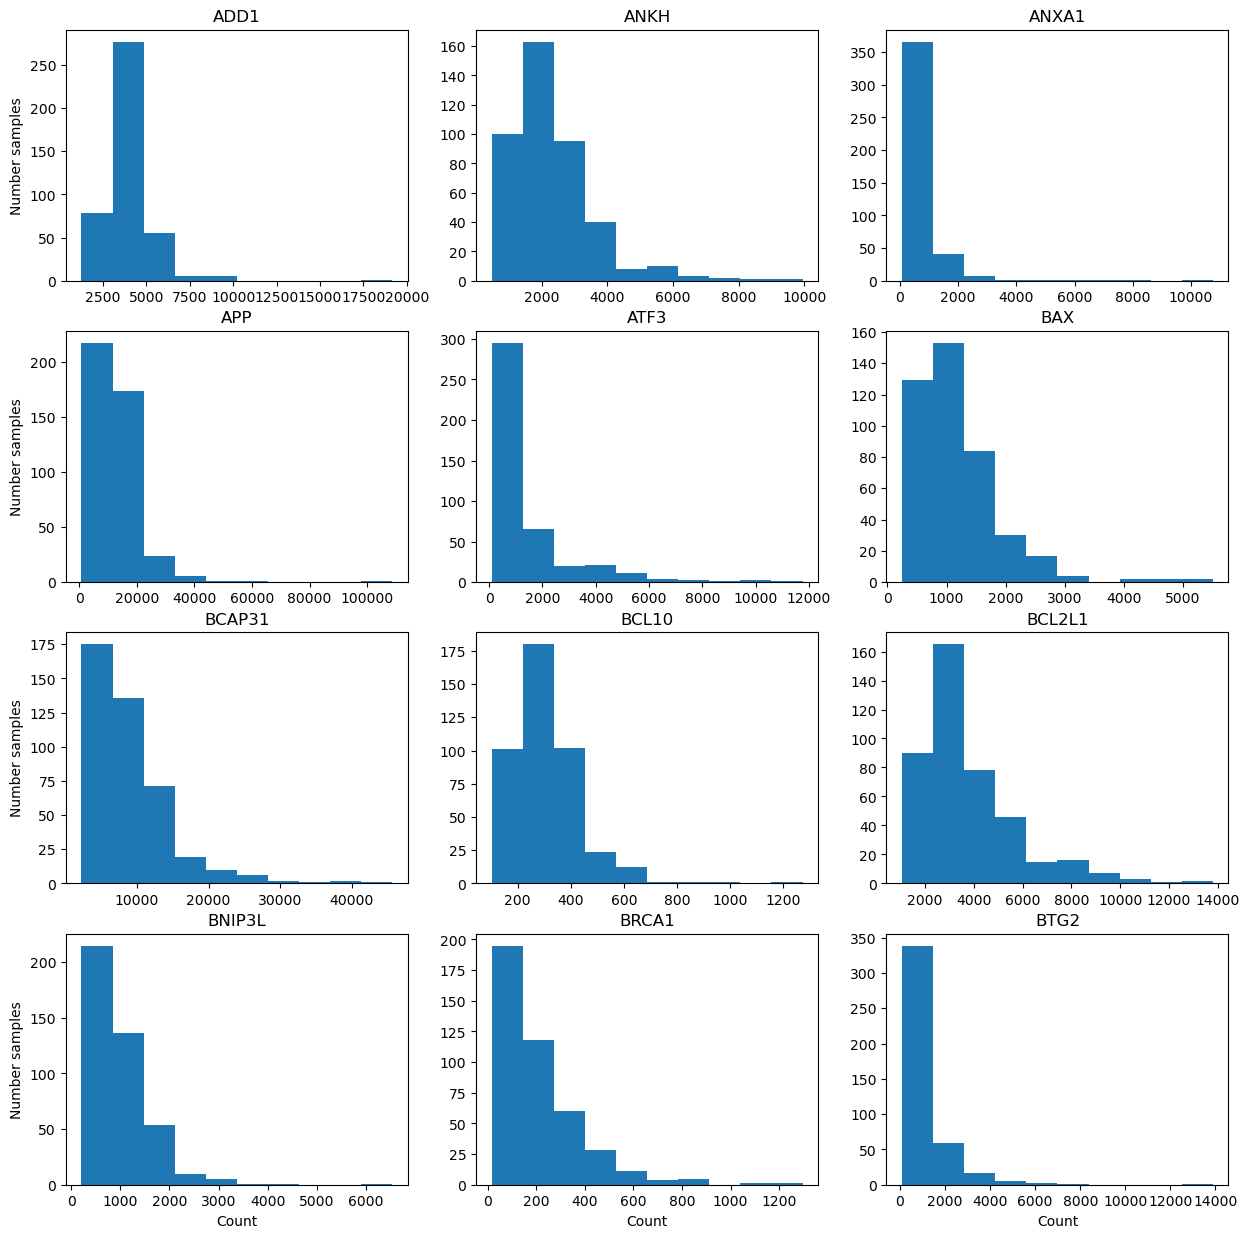

In [8]:
rows, cols = 4, 3
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
genes = ['ADD1', 'ANKH', 'ANXA1', 'APP', 'ATF3', 'BAX', 'BCAP31', 'BCL10', 'BCL2L1', 'BNIP3L', 'BRCA1', 'BTG2']
i = 0
for row in range(rows):
    for col in range(cols):
        axs[row, col].hist(exprs_genes[genes[i]].values)
        axs[row, col].title.set_text(genes[i])
        if col%3 == 0:
            axs[row, col].set_ylabel('Number samples')
        if row >= 3:
            axs[row, col].set_xlabel('Count')
        i += 1

In [9]:
full_df = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','tumor_stage']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
#ensuring ID uniqueness
full_df.index = [x+'-'+str(i) for i,x in enumerate(full_df.index)]
full_df.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,tumor_stage
tcga-2v-a95s-0,22283,584,0,375,0,286320,81,543,1,1032,...,274,795,19,500,3173,891,511,4,7,8170/3
tcga-2y-a9gs-1,22642,1573,3,99,0,31169,163,2,1,903,...,633,1154,72,1001,5302,756,861,7,483,not reported
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,1220,1134,13,1290,3220,861,524,15,84,stage i
tcga-2y-a9gu-3,9323,1253,0,2914,2,243941,72,0,0,722,...,286,1151,10,942,3093,1340,344,3,3,20187
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,1000,1632,5,1381,2903,576,666,3,120,stage i


In [10]:
# Subset full dataframe for patient samples that have a corresponding tumor stage
full_df = full_df.loc[full_df['tumor_stage'].str.startswith('stage')]

# Since there are substages (eg, stage iia and stage iib), we will conver them to the 4 main stages
full_df['tumor_stage'] = full_df['tumor_stage'].str.replace('stage ', '') \
                            .str.replace('a', '') \
                            .str.replace('b', '') \
                            .str.replace('c', '') \
                            .str.replace('v', '')
full_df

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,tumor_stage
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,1220,1134,13,1290,3220,861,524,15,84,i
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,1000,1632,5,1381,2903,576,666,3,120,i
tcga-2y-a9gw-5,73056,1423,0,270,0,43813,299,0,1,622,...,1647,707,30,748,8467,993,457,7,103,i
tcga-2y-a9gy-7,23352,1559,0,104,2,11699,42,2,3,1179,...,166,996,129,486,3825,458,471,14,1,ii
tcga-2y-a9gz-8,43942,2033,1,963,0,264407,97,1,0,919,...,444,1318,128,1550,1394,712,976,5,271,ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcga-ub-a7mf-396,13195,641,0,493,0,110307,169,0,1,999,...,307,1222,30,638,3961,918,465,5,0,iii
tcga-wx-aa47-404,689,763,0,199,0,67703,830,0,0,1075,...,295,750,91,647,811,1198,442,2,26,iii
tcga-xr-a8tf-408,62514,3612,0,306,0,3302,62,0,0,1152,...,777,1293,184,1291,945,814,871,2,29,i
tcga-ya-a8s7-410,2675,441,0,62,1,75528,1053,3,0,812,...,427,707,56,639,10911,800,699,3,3,iii


In [11]:
X = full_df.drop('tumor_stage',axis=1)
display(X.shape)
display(X.head())
y = full_df['tumor_stage']
display(y.shape)
display(y.head())
display(y.value_counts())

(139, 20501)

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
tcga-2y-a9gt-2,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
tcga-2y-a9gv-4,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120
tcga-2y-a9gw-5,73056,1423,0,270,0,43813,299,0,1,622,...,20,1647,707,30,748,8467,993,457,7,103
tcga-2y-a9gy-7,23352,1559,0,104,2,11699,42,2,3,1179,...,17,166,996,129,486,3825,458,471,14,1
tcga-2y-a9gz-8,43942,2033,1,963,0,264407,97,1,0,919,...,49,444,1318,128,1550,1394,712,976,5,271


(139,)

tcga-2y-a9gt-2     i
tcga-2y-a9gv-4     i
tcga-2y-a9gw-5     i
tcga-2y-a9gy-7    ii
tcga-2y-a9gz-8    ii
Name: tumor_stage, dtype: object

i      54
iii    53
ii     32
Name: tumor_stage, dtype: int64

<Axes: >

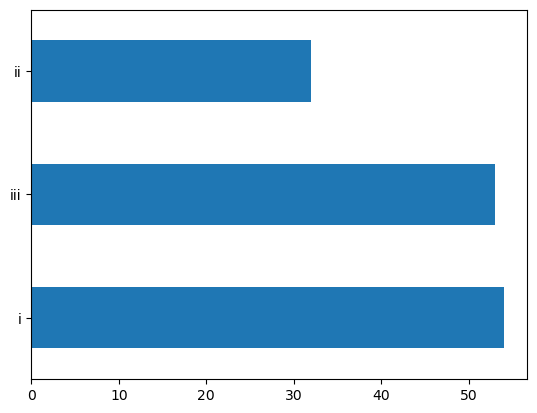

In [12]:
y.value_counts().plot(kind='barh')

Text(0, 0.5, 'No. Genes')

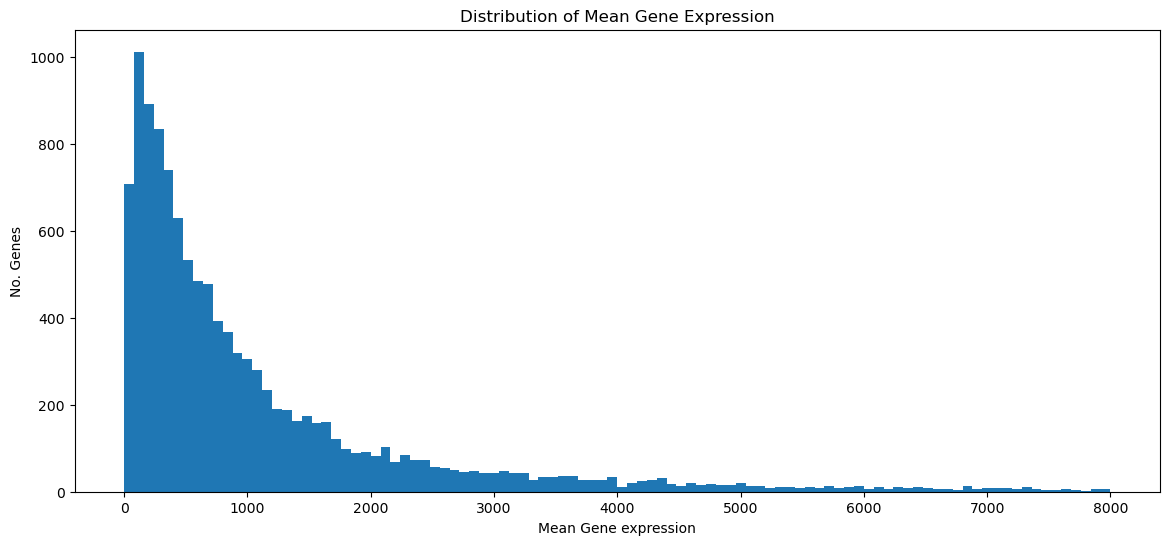

In [13]:
plt.figure(figsize=(14,6))
plt.hist(exprs_genes.mean(axis=0), range=(0, 8000), bins=100)
plt.title('Distribution of Mean Gene Expression')
plt.xlabel('Mean Gene expression')
plt.ylabel('No. Genes')

In [14]:
# save feature and label datasets
X.to_csv(data_dir + 'features.csv')
y.to_csv(data_dir + 'labels.csv')

In [15]:
all_hallmark_genes = np.unique(np.concatenate([v for k,v in geneset_dict.items()]))
len(all_hallmark_genes)

4384

In [16]:
rnaseq_sub = rnaseq_sub.loc[:,np.intersect1d(rnaseq_sub.columns.values,all_hallmark_genes)]
print(rnaseq_sub.shape)
rnaseq_sub.head()

(423, 4223)


,A2M,AAAS,AADAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRD1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
tcga-2v-a95s,286320,1032,25,7024,1535,1151,1678,93,109,1219,...,4,489,505,1712,639,0,0,305,464,3173
tcga-2y-a9gs,31169,903,156,8495,11220,1249,1126,74,50,1079,...,3,485,174,1347,348,0,0,677,629,5302
tcga-2y-a9gt,19515,773,479,3542,12577,3133,2186,70,25,2316,...,1,412,141,1564,260,0,0,399,287,3220
tcga-2y-a9gu,243941,722,36,5918,9671,1748,246,452,14,1269,...,1,332,106,626,237,0,0,433,451,3093
tcga-2y-a9gv,8756,828,616,6088,23069,2885,1129,110,39,2132,...,2,347,124,1320,339,0,0,642,100,2903
